# 量子コンピューター上の古典計算

## 目次

1. [イントロダクション](#intro)
2. [オラクルへの問い合わせ](#oracle)
3. [ゴミの取り出し](#garbage)

## 1. イントロダクション <a id='intro'></a>
普遍性を持つ量子ゲートの集合は古典計算を再現することができます。「*計算の原子*」で見てきたように、古典計算をブール論理ゲートにコンパイルして量子コンピューター上で再現するだけです。

これは量子コンピューターにおける重要な事実を示しています。それは古典コンピューターに可能なことは量子コンピューター上でも可能であり、さらに少なくとも古典計算と同等の計算の複雑性が実行できるということです。量子コンピューターの活用は既に古典コンピューターの方が優れたパフォーマンスを発揮するタスクに対して行うことが目的ではありませんが、それでも量子コンピューターが一般的な問題を解決することが可能ということをよく説明しています。

さらに量子コンピューターを用いた解決を要する問題はしばしば古典アルゴリズムを用いたアプローチが可能な側面を含んでいます。そのような場合は古典コンピューターを用いた解決も可能な場合もあります。しかし多くの場合、古典アルゴリズムは重ね合わせ状態が存在する入力に対して実行可能でなければありません。これは量子コンピューター上での古典アルゴリズムの実行を要します。本節ではそのようないくつかの例を紹介します。

## 2. オラクルへの問い合わせ <a id='oracle'></a>

多くの量子アルゴリズムは関数$f(x)$の解析を基本としており、入力$x$に対応する出力$f(x)$を返す関数が実装された「ブラックボックス」の存在を仮定しているだけの場合のことが多いです。このような関数は*オラクル*と呼ばれます。

オラクルを持ち出して抽象的に考えることで、関数そのものよりも関数を解析するテクニックに集中することができます。

量子アルゴリズム中でオラクルがどのように機能するか理解するために、オラクルがどのように定義されるのかを具体的に見ていく必要があります。オラクルがとる主要な形式の一つとして次のようなユニタリ発展で記述される*ブールオラクル*というものがあります。

$$
U_f \left|x , \bar 0 \right\rangle = \left|x, f(x)\right\rangle.
$$

ここで$\left|x , \bar 0 \right\rangle = \left|x \right\rangle \otimes \left|\bar 0 \right\rangle$は2つのレジスターから構成された複数量子ビット状態を表します。最初のレジスターは状態$\left|x\right\rangle$を表します。ここで$x$は関数の入力のバイナリ表現です。このレジスター中の量子ビット数は入力を表現するために必要なビット数です。

2つ目のレジスターの役割は出力のエンコードです。具体的には$U_f$を作用させた後のこのレジスターの状態は出力$\left|f(x)\right\rangle$のバイナリ表現となり、出力を表現するために必要な数の量子ビットによりレジスターは構成されます。
このレジスターの初期状態$\left|\bar 0 \right\rangle$は全ての量子ビットが$\left|0 \right\rangle$の状態を表します。そのほかの初期状態では$U_f$を作用させると異なる結果が得られます。具体的な結果はユニタリ行列$U_f$をどのように定義するかによります。

もう一つのオラクルの形式に次のように定義される*位相オラクル*があります。

$$
P_f \left|x \right\rangle = (-1)^{f(x)} \left|x \right\rangle,
$$

出力$f(x)$は基本的に$0$ or $1$の単純なビット値です。

位相オラクルはブールオラクルとずいぶん異なる形に見えますが、同じ基本的な考え方の別の表現です。前の節で扱った「位相キックバック」のメカニズムを用いて理解することができます。

これを確認するために、関数$f$に対応するブールオラクル$U_f$を考えてみます。このオラクルは本質的に一般化された制御NOTの形式で実装することができます。入力レジスターにより制御されるため、$f(x)=0$に対しては出力ビットは$\left|0 \right\rangle$のままで、$f(x)=1$の場合は$X$を作用させて$\left|1 \right\rangle$へと反転します。出力レジスターの初期状態が$\left|0 \right\rangle$ではなく$\left|- \right\rangle$の場合、$U_f$は$(-1)^{f(x)}$だけ位相を与えます。

$$
U_f \left( \left|x \right\rangle \otimes \left| - \right\rangle \right) = (P_f \otimes I) \left( \left|x \right\rangle \otimes \left| - \right\rangle \right)
$$

出力量子ビットの状態$\left|- \right\rangle$は全過程において不変であるため無視することができます。結局位相オラクルはブールオラクルを用いて実装が可能だということです。

## 3. ゴミの取り除き <a id='garbage'></a>

オラクルで評価される関数は通常古典コンピューター上で効率よく評価される関数です。しかし、オラクルを上で示したような形のユニタリゲートとして実装する必要があることは、オラクルを量子ゲートを用いて実装しなくてはならないことを意味しています。しかしながら古典アルゴリズムに使われるブールゲートを持ち出して対応するものに置き換えればよいという単純な話ではありません。

気を付けなければならない課題の１つは可逆性です。$U = \sum_x \left| f(x) \right\rangle \left\langle x \right|$という形式のユニタリ性は一意の入力$x$に対して一意の出力$f(x)$が得られる場合にのみ成りたちますが、一般的に真とはなりません。しかし出力に入力のコピーを含めるようにするだけで真とすることができます。それは先ほど見たブールオラクルの形式です。

$$
U_f \left|x,\bar 0 \right\rangle = \left| x,f(x) \right\rangle
$$

ユニタリ性を持つように演算を記述することで、重ね合わせ状態に対した演算を考察することが出来ます。例えば入力$x$がとり得る全ての状態の重ね合わせ状態である場合を考えましょう（簡単のため規格化はしていません）。結果はとり得る入出力ペアの重ね合わせとなるでしょう。

$$
U_f \sum_x \left|x,0\right\rangle = \sum_x \left|x,f(x)\right\rangle.
$$

古典アルゴリズムに適用する場合、重ね合わせは私たちの要求通りのふるまいをするように気を付ける必要もあります。古典アルゴリズムは所望の出力を演算するだけでなく、計算途中で追加の情報を生み出しもします。そのような演算における付加的な情報のゴミは古典的には重大な問題とはなりませんし、使われているメモリもゴミを削除すれば簡単に元通りにすることができます。しかし量子的な観点ではそう簡単なことではありません。

例えば古典アルゴリズムでの次のような演算を考えましょう。

$$
V_f \left|x,\bar 0, \bar 0 \right\rangle = \left| x,f(x), g(x) \right\rangle
$$

ここにある3つ目のレジスターは、古典アルゴリズムにおいて「メモ」として使われています。演算が終るとレジスターに残された情報は「ゴミ」$g(x)$として扱われます。$V_f$を用いて上の実装のユニタリ性を示しましょう。

量子アルゴリズムは通常干渉効果を元に構築されています。最も単純なのはユニタリ操作により重ね合わせを作り出し、逆操作によって重ね合わせを解消することです。全体としては些細なことですが、量子コンピュータが少なくともともそのような些細なことが可能であるということは確かめなければなりません。

例えば量子演算で何らかの過程を経て重ね合わせ状態$\sum_x \left|x,f(x)\right\rangle$を作り出し、私たちは$\sum_x \left|x,0\right\rangle$の状態を返す必要があるという状況を考えてみましょう。この場合は単に$U_f^\dagger$を作用させればよいです。これを適用する回路は$U_f$を作用させる回路を知っているとわかります。なぜなら単に$U_f$の回路中の各ゲートを逆演算のゲートに逆順で置き換えればよいからです。

しかし$U_f$をどのように作用させればよいかわからないが$V_f$の作用のさせ方はわかっている場合を考えてみます。この場合$U_f^\dagger$を作用させることは出来ませんが、$V_f^\dagger$であれば可能です。残念なことに情報のゴミが存在することで$U_f$の場合と同じ結果は得られません。

わかりやすい例として非常に単純な場合を考えます。$x$, $f(x)$, $g(x)$をそれぞれ単一ビットで構成し、また$f(x) = x$ and $g(x) = x$であるとします。これらは入力ビットで制御される単一の`cx`ゲートを用いることで実現可能です。

具体的にいうと、$U_f$を実装する回路は単一の入出力レジスター間の`cx`ゲートであるということです。

In [2]:
from qiskit import QuantumCircuit, QuantumRegister

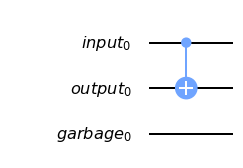

In [3]:
input_bit = QuantumRegister(1, 'input')
output_bit = QuantumRegister(1, 'output')
garbage_bit = QuantumRegister(1, 'garbage')

Uf = QuantumCircuit(input_bit, output_bit, garbage_bit)
Uf.cx(input_bit[0], output_bit[0])

Uf.draw()

$V_f$ではゴミ(garbage)のために入力のコピーを作る必要があり、次のように2つの`cx`ゲートを用いることが出来ます。

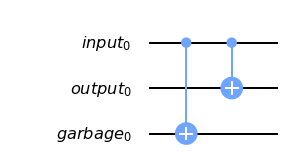

In [4]:
Vf = QuantumCircuit(input_bit, output_bit, garbage_bit)
Vf.cx(input_bit[0], garbage_bit[0])
Vf.cx(input_bit[0], output_bit[0])
Vf.draw()

それでは最初に$U_f$を作用させ、次に$V_f^{\dagger}$を作用させてみましょう。結果は次のような回路となります。

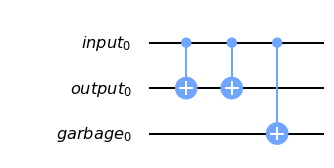

In [5]:
qc = Uf + Vf.inverse()
qc.draw()

この回路は互いにキャンセルし合う二つの`cx`ゲートから始まります。残ったのは最後にある入力とgarbageレジスター間の`cx`ゲートになります。数学的には下のような意味を持ちます。

$$
V_f^\dagger U_f \left| x,0,0 \right\rangle = V_f^\dagger \left| x,f(x),0 \right\rangle = \left| x , 0 ,g(x) \right\rangle.
$$

ここでわかることは$V_f^\dagger$は単に初期状態を返すわけではなく、最初の量子ビットと望まないgarbageビットとのエンタングルとなっているということです。返ってくる状態が私たちが必要としているものではないために、アルゴリズムの一連の流れは予想通りに動作しないのです。

このような理由から量子アルゴリズムでは古典的なgarbageビットを取り除く必要があります。「逆計算」と呼ばれる手法を用いることで実現することが可能です。必要なのはブランクの変数を用意して$V_f$をかけるだけです。

$$
\left| x, 0, 0, 0 \right\rangle \rightarrow \left| x,f(x),g(x),0 \right\rangle.
$$

そして出力をエンコードする量子ビットをコントロールビットに、新しく用意したブランクの変数をターゲットビットとした制御NOTゲートを作用させます。

これが1量子レジスターを用いた回路の例です。

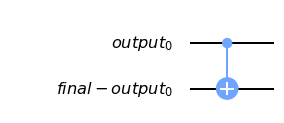

In [6]:
final_output_bit = QuantumRegister(1, 'final-output')

copy = QuantumCircuit(output_bit, final_output_bit)
copy.cx(output_bit, final_output_bit)

copy.draw()

この回路は情報をコピーする役割を持っています（もし量子複製不可能定理を知っているなら、これは同じプロセスではありません）。具体的には状態を次のように変換しています。

$$
\left| x,f(x),g(x),0 \right\rangle \rightarrow \left| x,f(x),g(x),f(x) \right\rangle.
$$

最後に最初の演算を取り消す$V_f^\dagger$を作用させます。

$$
\left| x,f(x),g(x),0 \right\rangle \rightarrow \left| x,0,0,f(x) \right\rangle.
$$

それでもコピーされた出力は残ります。結局garbageビットなしに演算が可能であり、目的の$U_f$を得ることが出来ました。

この例で扱った1量子ビットレジスターで$f(x) = x$の場合の回路は次のようになります。

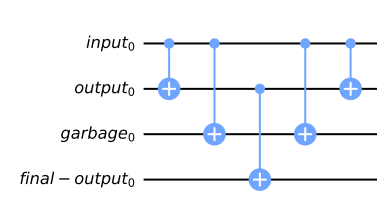

In [7]:
(Vf.inverse() + copy + Vf).draw()

`cx`ゲートの知識を用いることで2つのgarbageレジスターは互いに打ち消し合うことを理解しましょう。それゆえにgarbageレジスターを取り除くことが出来るのです。

### 練習問題
1. 「output」レジスターが$|0\rangle$で初期化されているとき出力が「final output」(のみ)に正しく書き込まれることを示しましょう。
2. 「output」レジスターが$|1\rangle$.で初期化されているとき何が起こるでしょう。

本節および本章の他の節の手法を用いることで量子アルゴリズムを構築するのに必要なツールは手に入りました。それではアルゴリズムを実際に見ていきましょう。

In [7]:
import qiskit.tools.jupyter
%qiskit_version_table

{'qiskit-terra': '0.14.2',
 'qiskit-aer': '0.5.2',
 'qiskit-ignis': '0.3.3',
 'qiskit-ibmq-provider': '0.7.2',
 'qiskit-aqua': '0.7.3',
 'qiskit': '0.19.6'}